# Analysis of Student Alcohol Consumption

### by Zeynep Yilmazcoban and Anna Grover

##### Education is a key factor for achieving a better society. Throughout this tutorial we will be analyzing the correlation between student alcohol consumption and school success. The dataset we will be using contains data of secondary school students in Portugal.

In [115]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

The first step of the data science cycle is data collection. Here, we do this by using pandas' read_csv function to read our student-mat.cvs file. For each student, the dataset provides information printed below. Using these different types of information, we can analyze how alcohol consumption affects students. 

In [116]:
data = pd.read_csv("student-mat.csv")
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Here is a list of some of the columns and their definitions as some column values might be unclear as to what they mean. For example, the health column contains a range of values where 1 shows that the student has very bad health and 5 shows great health. 

Column Definitions:
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- studytime - weekly study time (numeric: 1 - 10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
- G3 - final grades (from 0 to 20)

## Data Management/Representation

The goal of this stage of the data science cylce is to essentially clean up the dataset. We need to check for null or NaN values and get rid of them if necessary. Then we will check if there are any invalid or messy values in each column and update if necessary. Thankfully, the dataset we are using is already very clean and organized, so we will not need to do too much cleaning. However, we will  be reformatting our dataset in this stage to make it easier to use for our study and remove unnecessary information that we won't be utilizing to prevent confusion. 



Using the isnull function, we can see here that there are no null or NaN values in the data frame, so we don't need to worry about that.

In [117]:
data.isnull().sum().sum()

0

Now, we will reformat our data frame. We first decided to add a new column that shows total alcohol consumption in a week since the dataset has them seperately as workday alcohol consumption and weekend alcohol consumption. We do this by simply adding the values of workday alcohol amount and weekend alcohol amount. As shown in the beginning, alcohol consumption values are in a range of 1 to 5 where 1 is very low amount and 5 is very high amount. 
We will also rename some columns that has confusing names do that our data frame is easier to read for future use. We then drop several columns that we will not be using in our analysis.


In [118]:
# adding a new column of total weekly alcohol consumption
data['TotalAlc'] = data['Dalc'] + data['Walc']

# renaming columns
data.rename(columns = {'Pstatus':'parents cohabitation', 'famrel':'family relationship', 'Dalc' : 'workday alcohol',
                      'Walc' : 'weekend alcohol', 'G3' : 'final grade'}, inplace = True)

# dropping unrelated columns
data.drop(['address', 'G1', 'G2', 'reason', 'guardian', 'nursery', 'internet', 'paid', 'traveltime'], axis=1, inplace=True)
data

,school,sex,age,famsize,parents cohabitation,Medu,Fedu,Mjob,Fjob,studytime,...,romantic,family relationship,freetime,goout,workday alcohol,weekend alcohol,health,absences,final grade,TotalAlc
0,GP,F,18,GT3,A,4,4,at_home,teacher,2,...,no,4,3,4,1,1,3,6,6,2
1,GP,F,17,GT3,T,1,1,at_home,other,2,...,no,5,3,3,1,1,3,4,6,2
2,GP,F,15,LE3,T,1,1,at_home,other,2,...,no,4,3,2,2,3,3,10,10,5
3,GP,F,15,GT3,T,4,2,health,services,3,...,yes,3,2,2,1,1,5,2,15,2
4,GP,F,16,GT3,T,3,3,other,other,2,...,no,4,3,2,1,2,5,4,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,LE3,A,2,2,services,services,2,...,no,5,5,4,4,5,4,11,9,9
391,MS,M,17,LE3,T,3,1,services,services,1,...,no,2,4,5,3,4,2,3,16,7
392,MS,M,21,GT3,T,1,1,other,other,1,...,no,5,5,3,3,3,3,3,7,6
393,MS,M,18,LE3,T,3,2,services,other,1,...,no,4,4,1,3,4,5,0,10,7


## Exploratory Data Analysis

Here, we are using the describe function which will display a statistics summary of the numerical columns in our data frame.

In [119]:
data.describe()

,age,Medu,Fedu,studytime,failures,family relationship,freetime,goout,workday alcohol,weekend alcohol,health,absences,final grade,TotalAlc
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190,3.772152
std,1.276043,1.094735,1.088201,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443,1.984389
min,15.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000
25%,16.000000,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,2.000000
50%,17.000000,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,3.000000
75%,18.000000,4.000000,3.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,5.000000
max,22.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000,10.000000


This table provides us with important information. The average age of students in the study is approximately 17 and we see that there are not that many failures. In general, it seems like students have pretty good relationships with their families and have good health. Average alcohol consumption doesn't seem too high although there are students with maximum amount of consumption. 

#### School Demographics

In [120]:
data['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

From the values above, we can see that the majority of the students are between 16-19. There is only one person who is 21 and is legal for drinking in the US. However, it is important to keep in mind that the drinking age in Portugal is 18 and the law provides an exception for minors aged 16 and 17, if they consume a glass of beer, wine or cider with a meal in a restaurant.

###
Below, we will be creating plot that shows the average alcohol consumption per age group. To do that, we are creating a small table that takes the mean of total alcohol consumption per age group, then we plot that table. 

Text(0, 0.5, 'alcohol consumption (1 - low, 10 - high)')

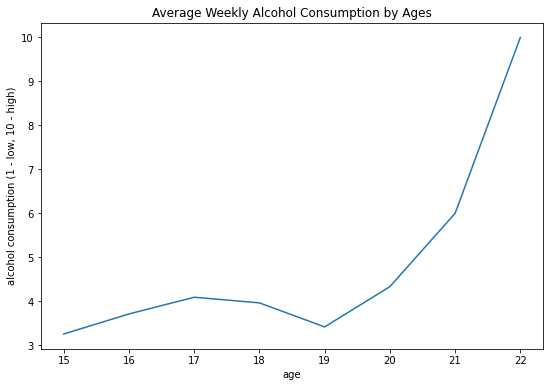

In [121]:
table = data.groupby('age')['TotalAlc'].mean()
plt.figure(figsize=(9, 6))
table.plot()
plt.title("Average Weekly Alcohol Consumption by Ages")
plt.ylabel("alcohol consumption (1 - low, 10 - high)")

From the above plot, we observe that in general, alcohol intake increases as the age goes up. Specifically, ages 21 and 22 have the highest amount. As expected, youngest age (15) has the lowest alcohol consumption. While consumption increases from ages 15 to 17, it slowly decreases from 17 to 19. After age 19, consumption increases very steeply.

###
Now, we are creating bar charts to show alcohol consumption on workdays vs. weekends. We do this using the seaborn bar charts. As expected, alcohol consumption is significantly higher during the weekends. 

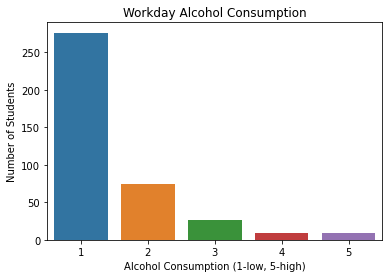

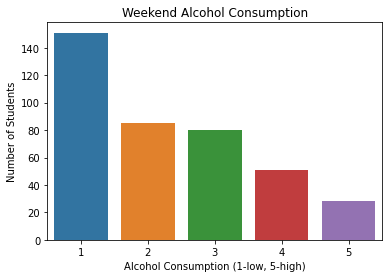

In [122]:
workdayalcohol = data["workday alcohol"].value_counts()
ax = sns.barplot(x = workdayalcohol.index, y = workdayalcohol.values)
plt.ylabel('Number of Students')
plt.xlabel('Alcohol Consumption (1-low, 5-high)')
plt.title('Workday Alcohol Consumption')
plt.show()
weekendalcohol = data["weekend alcohol"].value_counts()
ax = sns.barplot(x = weekendalcohol.index, y = weekendalcohol.values)
plt.ylabel('Number of Students')
plt.xlabel('Alcohol Consumption (1-low, 5-high)')
plt.title('Weekend Alcohol Consumption')
plt.show()

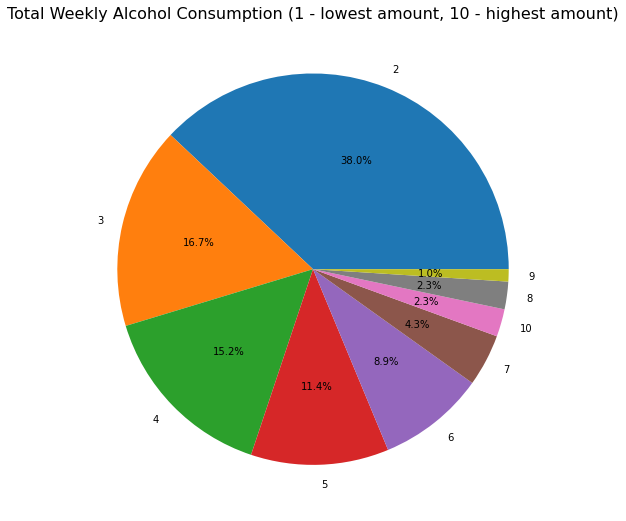

In [123]:
labels = data.TotalAlc.value_counts().index 
values = data.TotalAlc.value_counts().values 
plt.figure(figsize=(9, 9))
plt.pie(values, labels=labels, autopct= "%1.1f%%")
plt.title("Total Weekly Alcohol Consumption (1 - lowest amount, 10 - highest amount)", fontsize = 16)
plt.show()

The pie chart above shows us the percentage of students' alcohol intake amounts.

[Text(0.5, 0, 'Weekly Alcohol Intake (1-lowest, 10-highest)'),
 Text(0, 0.5, 'Final grades (0-20)')]

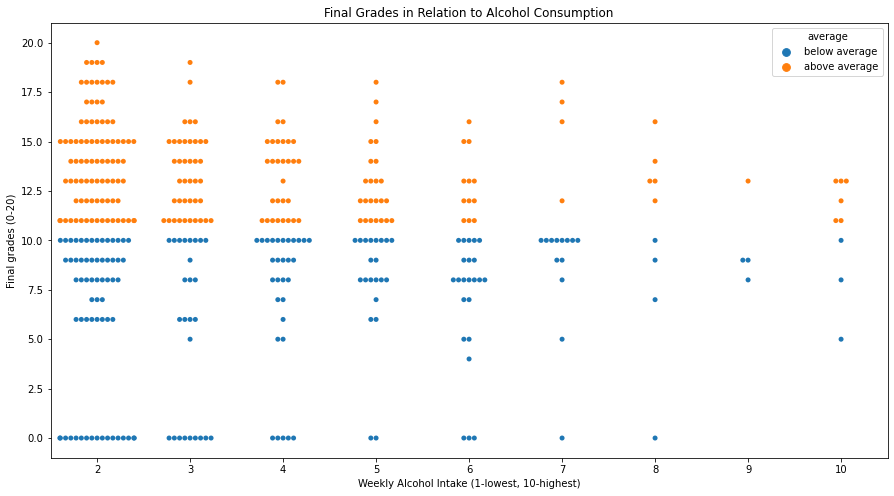

In [124]:
mean = sum(data['final grade']) / float(len(data))
data["average"] = ['above average' if i > mean else 'below average' for i in data['final grade']]
plt.figure(figsize = (15,8))
sp = sns.swarmplot(x = 'TotalAlc', y = 'final grade', hue = 'average', data = data)
sp.set(title = "Final Grades in Relation to Alcohol Consumption")
sp.set(xlabel = "Weekly Alcohol Intake (1-lowest, 10-highest)", ylabel = "Final grades (0-20)")

[Text(0.5, 0, 'final grade (1-20)'), Text(0, 0.5, 'density')]

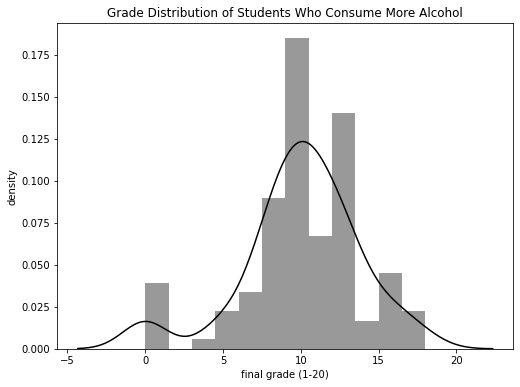

<Figure size 1080x576 with 0 Axes>

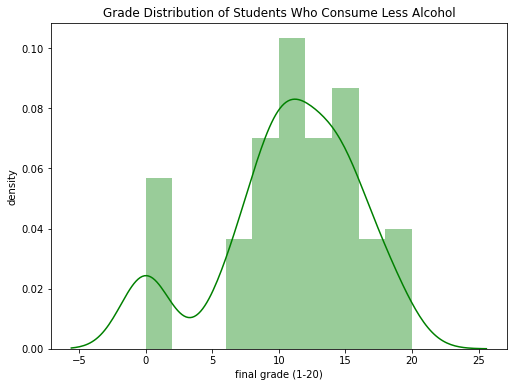

<Figure size 1080x576 with 0 Axes>

In [136]:
ax = plt.figure(figsize=(18,6)).add_subplot(121)
plt.figure(figsize = (15,8))
sns.distplot(data[(data.TotalAlc >= 5)]["final grade"], color = 'black', ax = ax)
ax.set_title('Grade Distribution of Students Who Consume More Alcohol')
ax.set(xlabel = "final grade (1-20)", ylabel = "density")
ax = plt.figure(figsize=(18,6)).add_subplot(122)
plt.figure(figsize = (15,8))
sns.distplot(data[(data.TotalAlc < 3)]['final grade'], color = 'green', ax = ax)
ax.set_title('Grade Distribution of Students Who Consume Less Alcohol')
ax.set(xlabel = "final grade (1-20)", ylabel = "density")

Looking at the tables above, we can say that students who consumed more alcohol received lower grades compared to those who consumed less alcohol.

Text(0.5, 1.0, 'Failures of Students Who Consume Less Alcohol')

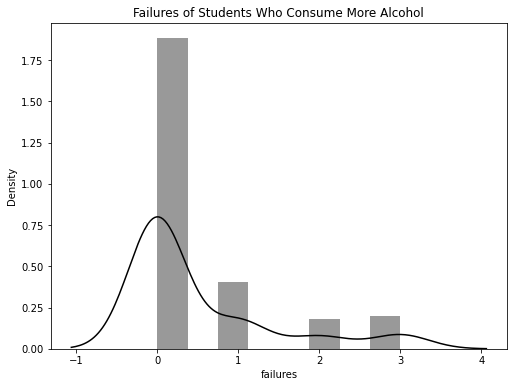

<Figure size 1080x576 with 0 Axes>

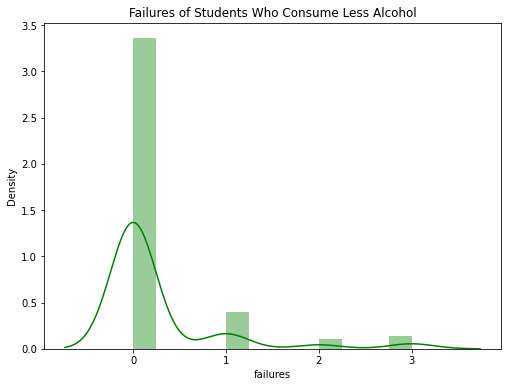

<Figure size 1080x576 with 0 Axes>

In [135]:
ax = plt.figure(figsize=(18,6)).add_subplot(121)
plt.figure(figsize = (15,8))
sns.distplot(data[(data.TotalAlc >= 5)]["failures"], color = 'black', ax = ax)
ax.set_title('Failures of Students Who Consume More Alcohol')
ax = plt.figure(figsize=(18,6)).add_subplot(122)
plt.figure(figsize = (15,8))
sns.distplot(data[(data.TotalAlc < 3)]['failures'], color = 'green', ax = ax)
ax.set_title('Failures of Students Who Consume Less Alcohol')

Here, the number of students who did not fail any classes is significantly higher for students who consumed less alcohol compared to the ones who consumed more.  

Text(0.5, 1.0, 'Health of Students Who Consume Less Alcohol')

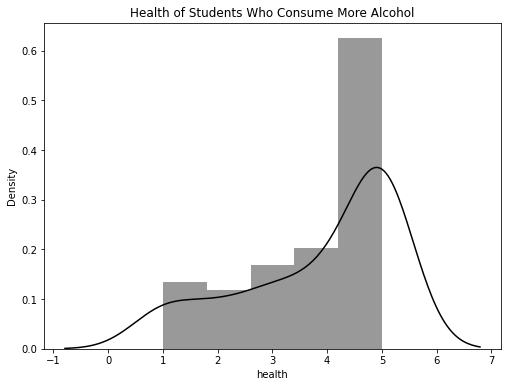

<Figure size 1080x576 with 0 Axes>

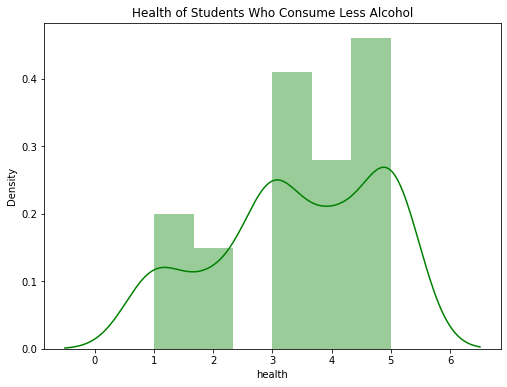

<Figure size 1080x576 with 0 Axes>

In [138]:
ax = plt.figure(figsize=(18,6)).add_subplot(121)
plt.figure(figsize = (15,8))
sns.distplot(data[(data.TotalAlc >= 6)]["health"], color = 'black', ax = ax)
ax.set_title('Health of Students Who Consume More Alcohol')
ax = plt.figure(figsize=(18,6)).add_subplot(122)
plt.figure(figsize = (15,8))
sns.distplot(data[(data.TotalAlc < 3)]['health'], color = 'green', ax = ax)
ax.set_title('Health of Students Who Consume Less Alcohol')

Again, as we predicted, students